In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
from matplotlib.patches import Rectangle

In [37]:
def plot_scenario1_soln(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 5), 7.5, 10))
    ax.add_patch(Rectangle((12.5, 5), 7.5, 10))
    ax.plot(arr[:, 0], arr[:, 1], color="r")
    ax.plot(arr[:, 2], arr[:, 3], color="g")
    ax.plot(arr[:, 4], arr[:, 5], color="b")
    ax.plot(arr[:, 6], arr[:, 7], color="y")
    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=0, right=20)
    ax.set_ylim(bottom=0, top=20)
    plt.show()

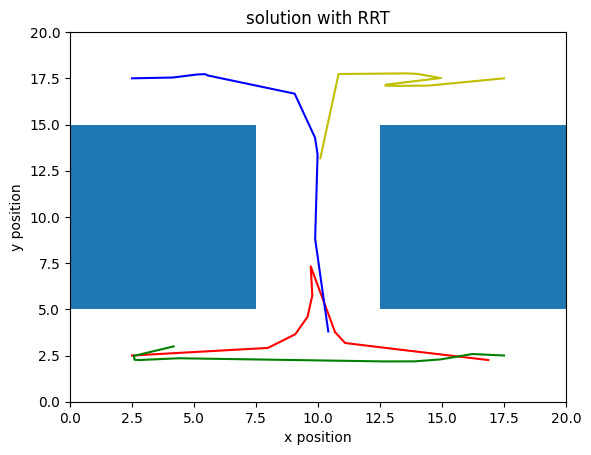

In [38]:
rrt_soln = """
2.5 2.5 17.5 2.5 2.5 17.5 17.5 17.5
7.98204 2.91142 16.2254 2.58232 4.1414 17.5425 14.4398 17.1054
9.08323 3.65245 14.9436 2.29013 5.10542 17.7051 13.1598 17.091
9.57783 4.59656 13.8993 2.18513 5.43933 17.7285 12.7058 17.11
9.76843 5.74934 12.6863 2.18038 5.55609 17.6542 12.7391 17.1579
9.7056 7.32156 4.38067 2.35196 9.0569 16.6695 14.9503 17.5151
10.6861 3.76823 2.8293 2.25828 9.87942 14.2875 14.0111 17.7391
11.0905 3.17749 2.60074 2.26999 9.98149 13.3936 13.5494 17.7682
13.0989 2.85091 2.57424 2.48011 9.8836 8.81104 10.8283 17.733
16.8682 2.25552 4.1797 2.99381 10.4125 3.80198 10.0918 13.1719
"""

plot_scenario1_soln("solution with RRT", rrt_soln)